In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import operator

In [2]:
covid = pd.read_csv('Resources/covid_data.csv')
covid.head()

,Unnamed: 0,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,Alabama,0,0,0,0,0,0,0,0,0,...,7294,7611,7888,8112,8437,8691,9046,9385,9668,9889
1,Alaska,0,0,0,0,0,0,0,0,0,...,364,365,368,370,371,372,374,377,378,379
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,7969,8364,8640,8924,9305,9707,9945,10526,10960,11119
4,Arkansas,0,0,0,0,0,0,0,0,0,...,3337,3372,3437,3491,3525,3611,3703,3747,3747,4012


In [3]:
newdataframe = covid.transpose()
newdataframe

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
Unnamed: 0,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/6/2020,8691,372,0,9707,3611,60616,17832,30995,5778,49,...,13938,34928,5595,908,66,20985,15905,1242,8901,631
5/7/2020,9046,374,0,9945,3703,62148,18370,31784,5939,49,...,14096,36036,5724,916,66,21570,16231,1287,9215,635
5/8/2020,9385,377,0,10526,3747,63779,18827,32411,6111,49,...,14441,37246,5919,919,68,22342,16388,1323,9590,644
5/9/2020,9668,378,0,10960,3747,66558,19375,32984,6277,49,...,14768,38394,6103,921,68,23196,16674,1323,9939,653


In [4]:
new_header = newdataframe.iloc[0] #grab the first row for the header
newdataframe2 = newdataframe[1:] #take the data less the header row
newdataframe2.columns = new_header #set the header row as the df header

In [5]:
states = list(newdataframe2.columns.values)
states

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [6]:
def poly_pred (x, y):
    x_2 = np.arange(1, x.shape[0]+1, 1).reshape(-1, 1)
    y_2 = y[:, np.newaxis]
    polynomial_features= PolynomialFeatures(degree=3)
    x_poly = polynomial_features.fit_transform(x_2)


    model = LinearRegression()
    model.fit(x_poly, y_2)
    y_poly_pred = model.predict(x_poly)

    return x_2, y_2, y_poly_pred

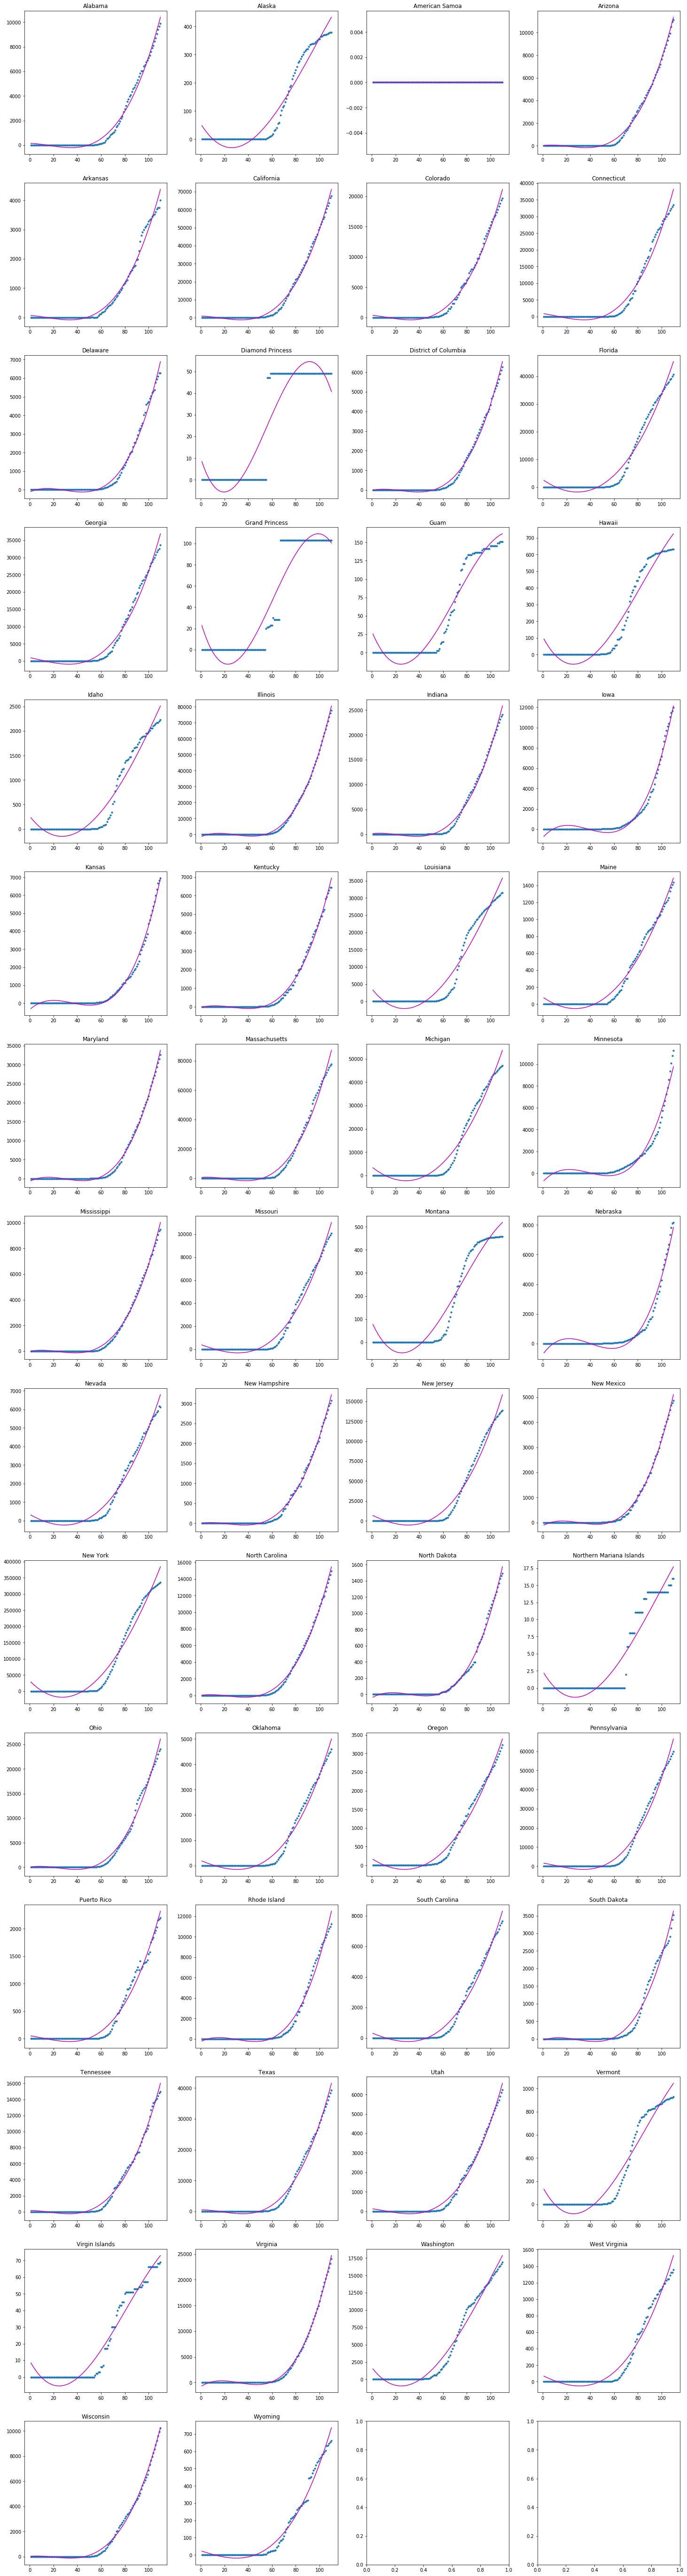

In [7]:
fig, axes = plt.subplots(15, 4, figsize = (25, 100))
axes = axes.flatten()
x=np.array(pd.to_datetime(newdataframe2.index), dtype=float)
for i, state in enumerate(states):
    y = pd.to_numeric(newdataframe2[state])
    x_2, y_2, y_poly_pred = poly_pred(x, y)
    ax = axes[i]
    ax.scatter(x_2, y_2, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_2,y_poly_pred), key=sort_axis)
    x_2, y_poly_pred = zip(*sorted_zip)
    ax.plot(x_2, y_poly_pred, color='m')
    ax.set_title(state)

In [8]:
x_2 = np.arange(1, x.shape[0]+1, 1).reshape(-1, 1)
y_2 = y[:, np.newaxis]
polynomial_features= PolynomialFeatures(degree=3)
predictions = {}
for i, state in enumerate(states):
    y = pd.to_numeric(newdataframe2[state])
    x_2, y_2, y_poly_pred = poly_pred(x, y)
    x_poly = polynomial_features.fit_transform(x_2)
    model = LinearRegression()
    model.fit(x_poly, y_2)
    y_poly_pred = model.predict(x_poly)
    x_new = np.arange(x.shape[0]+2, 225, 1).reshape(-1, 1)
    x_poly_new = polynomial_features.fit_transform(x_new)
    y_poly_pred_new = model.predict(x_poly_new)
    a_pred = []
    for j in y_poly_pred_new:
        a_pred.append(j[0])
    predictions[state] = a_pred
from datetime import datetime, timedelta
d = datetime.strptime(newdataframe2.index[0], '%m/%d/%Y')
d1 = d + timedelta(days = len(newdataframe2))
d2 = d1.strftime("%m/%d/%Y")
new_dates = []
for j in range(len(predictions['Alabama'])):
    new_dates.append(d2)
    d1 = d1 + timedelta(days = 1)
    d2 = d1.strftime("%m/%d/%Y")
predictions["Date"] = new_dates
new_df = pd.DataFrame(predictions)
cols = new_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
new_df = new_df[cols]
new_df

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,05/11/2020,11143.583695,446.945951,0.0,12202.424967,4680.713285,76330.026432,22596.093059,40802.261892,7461.665238,...,17122.857778,44526.819271,7026.484150,1073.564762,74.681678,26844.348201,18529.706689,1625.388374,10998.092299,783.838936
1,05/12/2020,11527.662341,454.136126,0.0,12638.200082,4839.595538,78937.144149,23349.383390,42188.074585,7757.197232,...,17702.641177,46078.055210,7257.768917,1087.693085,75.526455,27948.210838,18856.962317,1674.583773,11380.245881,808.044817
2,05/13/2020,11920.087394,461.270710,0.0,13083.897873,5001.880705,81600.659588,24118.492339,43603.181969,8060.133896,...,18294.895272,47663.436674,7493.833148,1101.539827,76.346756,29080.772818,19183.763437,1724.658963,11770.906656,832.707944
3,05/14/2020,12320.945335,468.346520,0.0,13539.627160,5167.603521,84321.156392,24903.577783,45047.875356,8370.563980,...,18899.748694,49283.322870,7734.723580,1115.094842,77.141814,30242.390192,19510.015524,1775.620638,12170.166149,857.832234
4,05/15/2020,12730.322641,475.360376,0.0,14005.496764,5336.798723,87099.218205,25704.797599,46522.446059,8688.576237,...,19517.330078,50938.073010,7980.486947,1128.347981,77.910862,31433.419015,19835.624049,1827.475491,12578.115881,883.421605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,08/27/2020,118504.771770,252.810623,0.0,138815.557196,48593.524043,802919.207841,227583.088400,419207.705159,100282.489872,...,178056.219844,482687.966391,69162.235738,-1099.111981,-132.231490,384576.677503,31948.996627,13388.279470,120110.212396,6839.851315
109,08/28/2020,120289.936504,235.615804,0.0,140951.741609,49320.623554,814989.574768,230957.006440,425440.541062,101890.533434,...,180726.076354,490002.432946,70179.738057,-1174.023486,-138.465828,390837.343592,31680.990736,13571.162688,121939.962742,6936.075905
110,08/29/2020,122092.787348,218.021822,0.0,143109.601227,50054.877429,827179.372973,234363.793883,431734.133274,103515.566849,...,183422.295857,497389.839680,71207.067230,-1250.312443,-144.807554,397165.162751,31402.321465,13755.648508,123788.104765,7033.180847
111,08/30/2020,123913.410779,200.025495,0.0,145289.244870,50796.320402,839489.186101,237803.608606,438088.773104,105157.678867,...,186145.006988,504850.545802,72244.269993,-1327.988999,-151.257434,403560.491035,31112.894287,13941.743621,125654.729987,7131.170058


In [9]:
new_df.to_csv("predictions.csv")